In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as pylab
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
import joblib






In [2]:

# Load your data
data = pd.read_excel("data/Query333.xlsx")



In [3]:
# how many records 
len(data)


178241

In [4]:
# how many records 
data.head()


,class,type,price,area,Date,nighberhood,المخطط,القطعة
0,1,1,255000,125.00,01/01/2013,11,2351/ د,63/3
1,1,3,178914,694.54,01/01/2013,10,2509,عدد العقارات 2-أول قطعة3460
2,1,3,195014,757.40,01/01/2013,10,2509,عدد العقارات 2-أول قطعة5770
3,1,3,2280000,1400.00,01/01/2013,11,2351/ د,960
4,1,3,2965050,898.52,01/01/2013,6,3114,2423


In [5]:
# Parse the date column
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract date features
data['dd'] = data['Date'].dt.day
data['mm'] = data['Date'].dt.month
data['yyyy'] = data['Date'].dt.year

# Define the columns for features and targets
features_columns = ['class', 'type', 'area', 'nighberhood', 'dd', 'mm', 'yyyy']
target_columns = ['price']


C:\Users\admin\AppData\Local\Temp\ipykernel_18356\3207125009.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5,


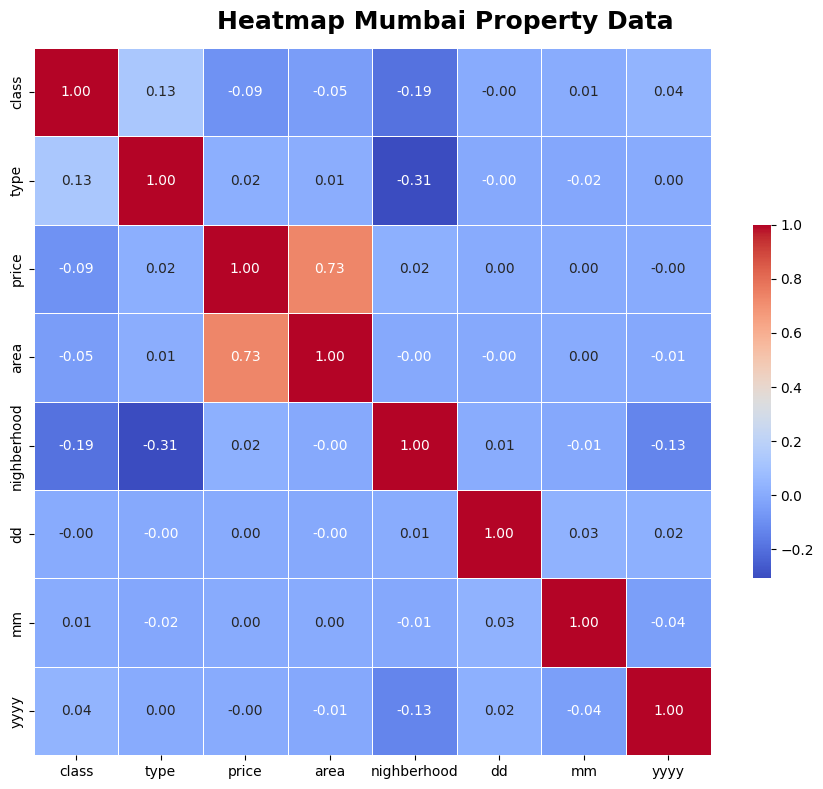

In [6]:
fig = plt.figure(figsize=(9, 8))
rcParams = {'xtick.labelsize': '14',
            'ytick.labelsize': '14', 'axes.labelsize': '16'}
sns.heatmap(data.corr(), annot=True, linewidths=.5,
            cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Mumbai Property Data', fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi=250)


In [7]:
xgboost_regressor = XGBRegressor()
gradient_boosting_regressor = GradientBoostingRegressor()


In [8]:
def create_voting_regressor():
    return VotingRegressor(estimators=[
        ('XGBoostRegressor', xgboost_regressor),
        ('GradientBoostingRegressor', gradient_boosting_regressor),
    ], weights=[2,3])  # Specify equal weights for simplicity


In [9]:

# Splitting data into features and targets
X = data[features_columns]
y = data[target_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# # Initialize the Min-Max scaler and StandardScaler for the target variable
# target_min_max_scaler = MinMaxScaler()
# target_standard_scaler = StandardScaler()

# # Fit the scalers on the training target variable
# target_min_max_scaler.fit(y_train)
# target_standard_scaler.fit(y_train)

# # Transform the target variable in both the training and testing data
# y_train_min_max_scaled = target_min_max_scaler.transform(y_train)
# y_test_min_max_scaled = target_min_max_scaler.transform(y_test)

# y_train_standardized = target_standard_scaler.transform(y_train)
# y_test_standardized = target_standard_scaler.transform(y_test)

# List of models to train
models = {
    "GradientBoosting": GradientBoostingRegressor(),
    "RandomForest": RandomForestRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(),
    # verbosity = 2, learning_rate = 0.1, subsample = 0.3, max_depth = 10
    "Bagging": BaggingRegressor(),  # Bagging ensemble
    "AdaBoost": AdaBoostRegressor(),  # AdaBoost ensemble
    "VotingRegressor": create_voting_regressor(),
    # K-Nearest Neighbors (KNN) with K=3
    "KNN_3": KNeighborsRegressor(n_neighbors=3),
    # K-Nearest Neighbors (KNN) with K=5
    "KNN_5": KNeighborsRegressor(n_neighbors=5),
    # K-Nearest Neighbors (KNN) with K=7
    "KNN_7": KNeighborsRegressor(n_neighbors=7)  ,
    "KNN_15": KNeighborsRegressor(n_neighbors=15),
    "SVR": SVR(),  # Support Vector Machine (SVM) Regression

}


In [10]:


# Define a directory to save trained models
model_dir = "ai6-2-last/"

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)



In [11]:
def get_regression_metrics(name, trained_model, x_train, y_train, x_test, y_test):
    # Predictions on training data
    train_predict = trained_model.predict(x_train)

    # Predictions on test data
    test_predict = trained_model.predict(x_test)
    joblib.dump(trained_model, os.path.join(model_dir, f"{name}1.pkl"))

    # Calculate RMSE for training and testing data
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
    print(f"_____{name} Regression Metrics_____")
    print(f"____ Training Data _____")
    
    print("R-squared [TRAIN]:", r2_score(y_train, train_predict))
    print("MSE Mean Squared Error [TRAIN]:",
          mean_squared_error(y_train, train_predict))
    print("RMSE Root Mean Squared Error [TRAIN]:", train_rmse)
    print("MAE Mean Absolute Error [TRAIN]:",
          mean_absolute_error(y_train, train_predict))

    print(f"____ Testing Data _____")    
    print("R-squared [TEST]:", r2_score(y_test, test_predict))
    print("MSE Mean Squared Error [TEST]:",
          mean_squared_error(y_test, test_predict))
    print("RMSE Root Mean Squared Error [TEST]:", test_rmse)
    print("MAE Mean Absolute Error [TEST]:",
          mean_absolute_error(y_test, test_predict))

    # Visual Inspection: Scatter plot of True vs. Predicted values for test data
    plt.scatter(y_test, test_predict)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(name + ' Predictions vs. True Values (Test Data)')
    plt.show()
    plt.figure(figsize=(8, 4), facecolor="white")

    plt.plot(y_train, color="red")
    plt.plot(train_predict, color="blue")
    train_size = len(data) * .8
    plt.vlines(
        train_size,
        ymin=train_predict.min(),
        ymax=train_predict.max(),
        color="grey",
        linestyle="--",
        alpha=0
    )
    plt.title(f"{name}  Price Prediction Graph")
    plt.legend(['Actual Price', 'Predicted Price'])
    plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_____GradientBoosting Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.9154101186800747
MSE Mean Squared Error [TRAIN]: 4.962019417783206e-06
RMSE Root Mean Squared Error [TRAIN]: 0.002227559071670874
MAE Mean Absolute Error [TRAIN]: 0.00038713792163425407
____ Testing Data _____
R-squared [TEST]: 0.8984872888668337
MSE Mean Squared Error [TEST]: 4.604730565350116e-06
RMSE Root Mean Squared Error [TEST]: 0.0021458635943018643
MAE Mean Absolute Error [TEST]: 0.0003886922500718041


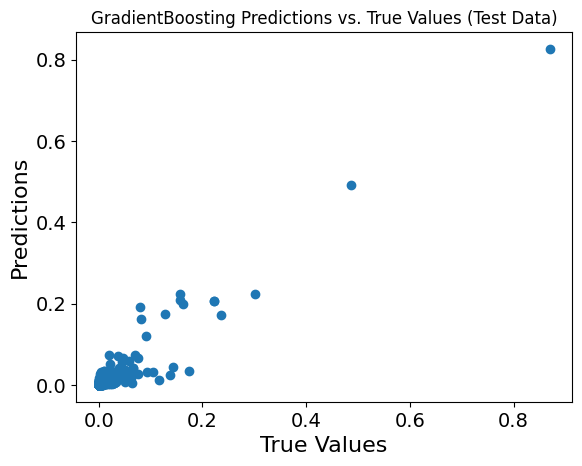

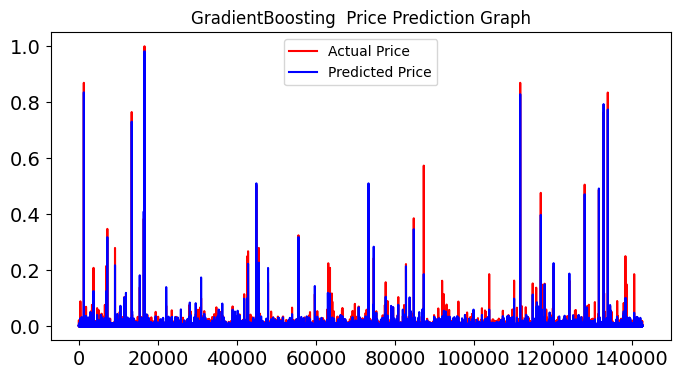

C:\Users\admin\AppData\Local\Temp\ipykernel_18356\539918671.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train_min_max_scaled)


_____RandomForest Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.948293183356883
MSE Mean Squared Error [TRAIN]: 3.0331077926984525e-06
RMSE Root Mean Squared Error [TRAIN]: 0.0017415819798959945
MAE Mean Absolute Error [TRAIN]: 0.00012743097127506436
____ Testing Data _____
R-squared [TEST]: 0.8173018800203825
MSE Mean Squared Error [TEST]: 8.287391873501897e-06
RMSE Root Mean Squared Error [TEST]: 0.002878783054261279
MAE Mean Absolute Error [TEST]: 0.0002912990091823038


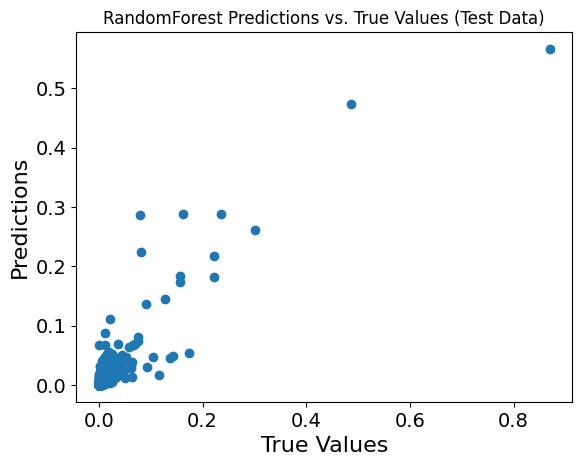

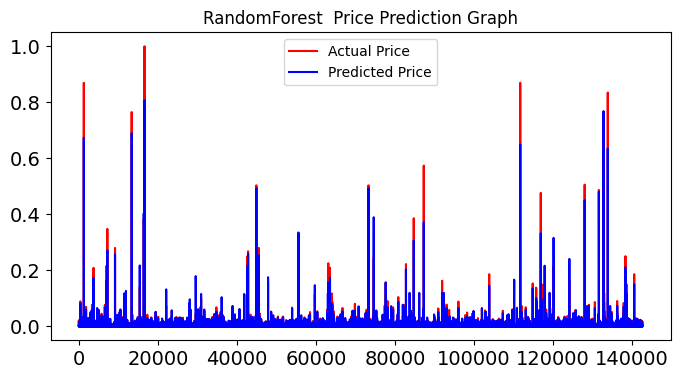

_____DecisionTreeRegressor Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.9995647465983476
MSE Mean Squared Error [TRAIN]: 2.5531846090282377e-08
RMSE Root Mean Squared Error [TRAIN]: 0.00015978687709033672
MAE Mean Absolute Error [TRAIN]: 2.1840740992517204e-05
____ Testing Data _____
R-squared [TEST]: 0.7381629673472851
MSE Mean Squared Error [TEST]: 1.1877221817225303e-05
RMSE Root Mean Squared Error [TEST]: 0.003446334548070646
MAE Mean Absolute Error [TEST]: 0.0003472652546159222


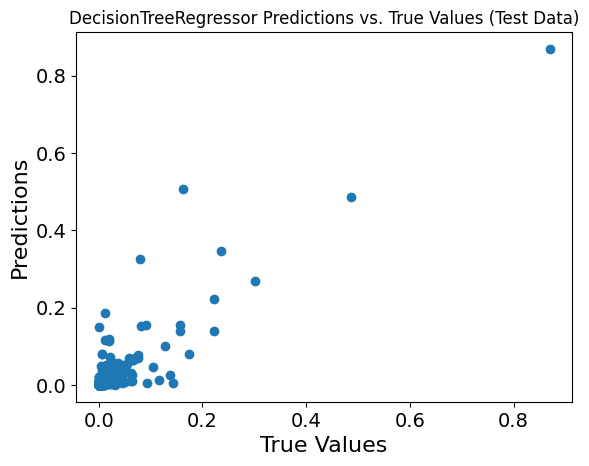

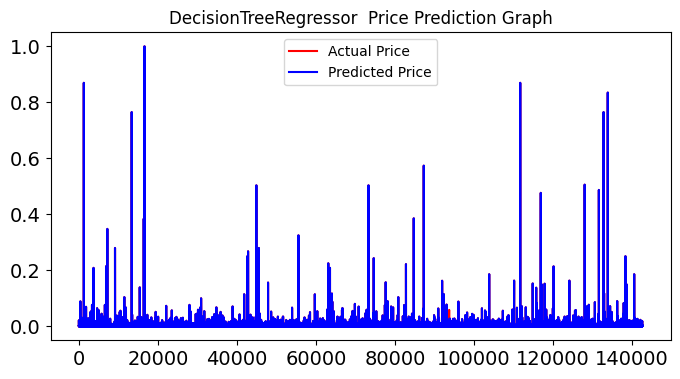

_____XGBoost Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.9906507576055489
MSE Mean Squared Error [TRAIN]: 5.484240145387341e-07
RMSE Root Mean Squared Error [TRAIN]: 0.0007405565572856229
MAE Mean Absolute Error [TRAIN]: 0.0002302619566901787
____ Testing Data _____
R-squared [TEST]: 0.8764667312383159
MSE Mean Squared Error [TEST]: 5.603607786204487e-06
RMSE Root Mean Squared Error [TEST]: 0.002367194074469706
MAE Mean Absolute Error [TEST]: 0.00031105095533103487


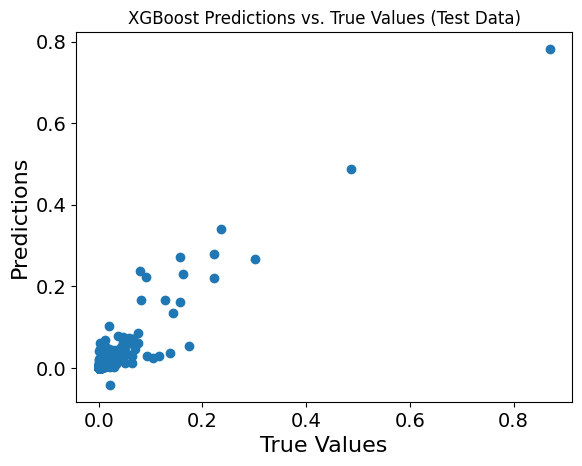

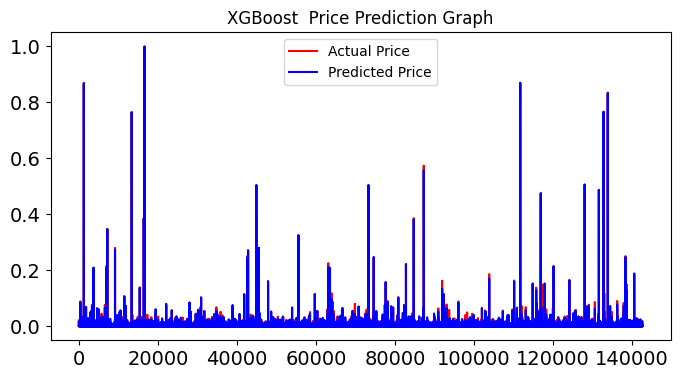

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


_____Bagging Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.9172738866182962
MSE Mean Squared Error [TRAIN]: 4.852691297736316e-06
RMSE Root Mean Squared Error [TRAIN]: 0.002202882497487398
MAE Mean Absolute Error [TRAIN]: 0.00013981585326236924
____ Testing Data _____
R-squared [TEST]: 0.7990592183882642
MSE Mean Squared Error [TEST]: 9.114899489770353e-06
RMSE Root Mean Squared Error [TEST]: 0.0030190891821492045
MAE Mean Absolute Error [TEST]: 0.0003069034773277726


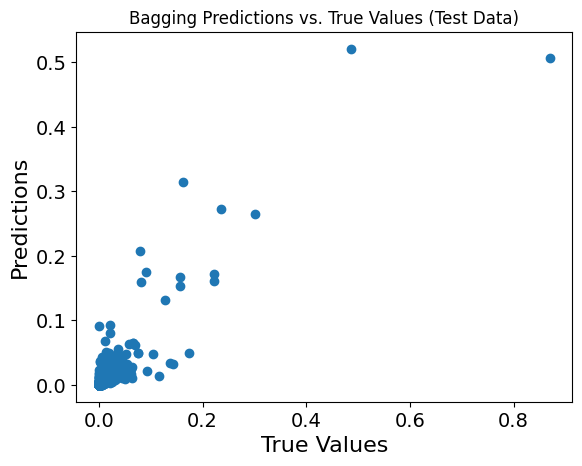

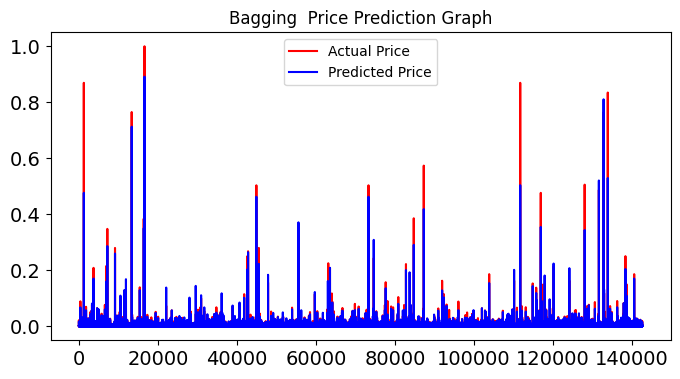

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_____AdaBoost Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.7511182501028478
MSE Mean Squared Error [TRAIN]: 1.4599335717836467e-05
RMSE Root Mean Squared Error [TRAIN]: 0.003820907708625853
MAE Mean Absolute Error [TRAIN]: 0.0008423530221693991
____ Testing Data _____
R-squared [TEST]: 0.720390248966827
MSE Mean Squared Error [TEST]: 1.2683412279900449e-05
RMSE Root Mean Squared Error [TEST]: 0.0035613778625555093
MAE Mean Absolute Error [TEST]: 0.0008228053372208844


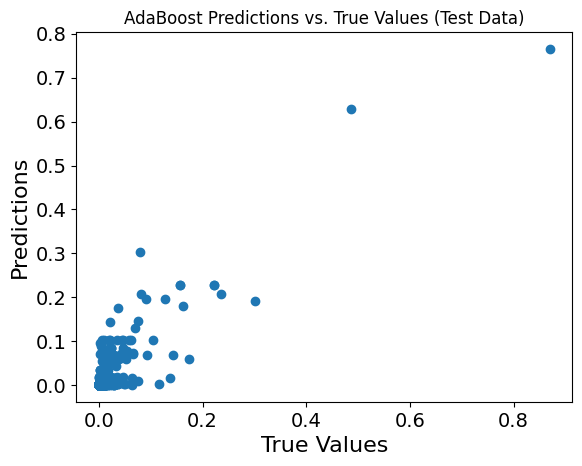

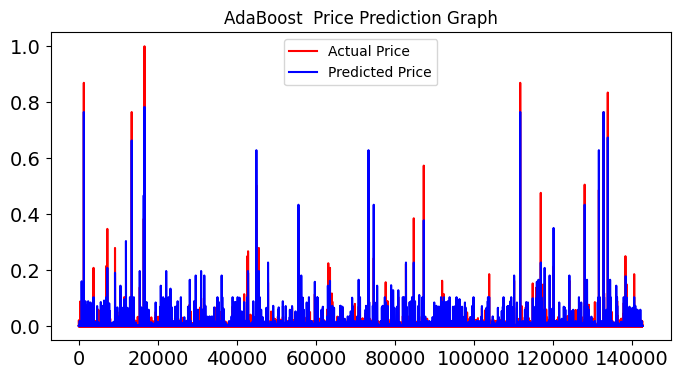

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_____VotingRegressor Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.9606258759035485
MSE Mean Squared Error [TRAIN]: 2.3096754041523497e-06
RMSE Root Mean Squared Error [TRAIN]: 0.0015197616274114666
MAE Mean Absolute Error [TRAIN]: 0.00030822814697824003
____ Testing Data _____
R-squared [TEST]: 0.9061986010054276
MSE Mean Squared Error [TEST]: 4.254936787731885e-06
RMSE Root Mean Squared Error [TEST]: 0.0020627498122001817
MAE Mean Absolute Error [TEST]: 0.00033449059729705665


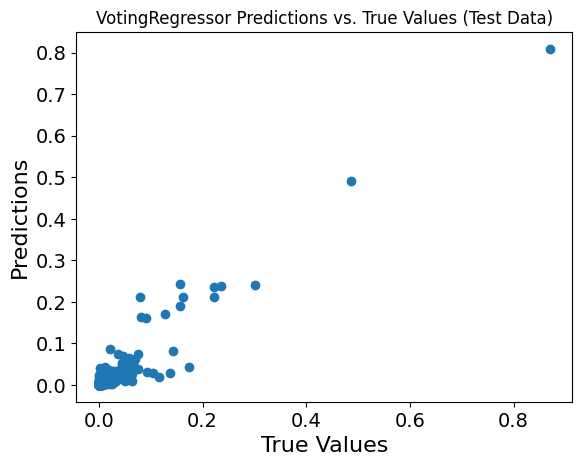

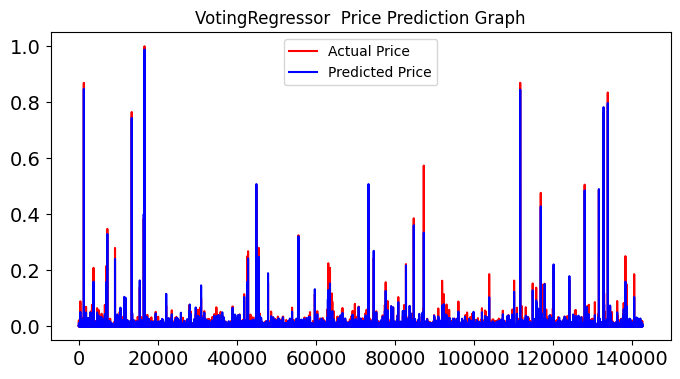

_____KNN_3 Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.8463143206341003
MSE Mean Squared Error [TRAIN]: 9.015160127304363e-06
RMSE Root Mean Squared Error [TRAIN]: 0.003002525624753994
MAE Mean Absolute Error [TRAIN]: 0.0003093892393253882
____ Testing Data _____
R-squared [TEST]: 0.6841586895228238
MSE Mean Squared Error [TEST]: 1.432691650060087e-05
RMSE Root Mean Squared Error [TEST]: 0.00378509134640115
MAE Mean Absolute Error [TEST]: 0.0004543812685980052


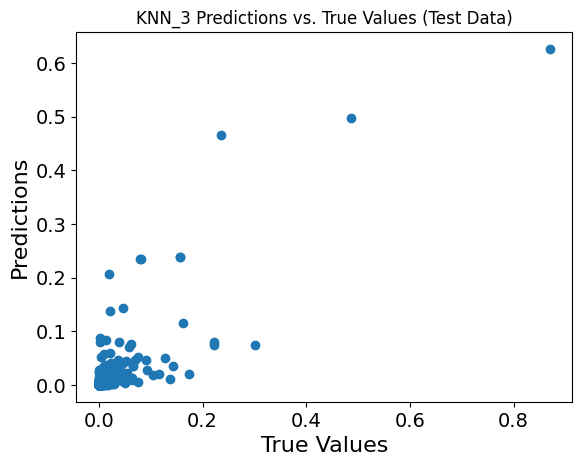

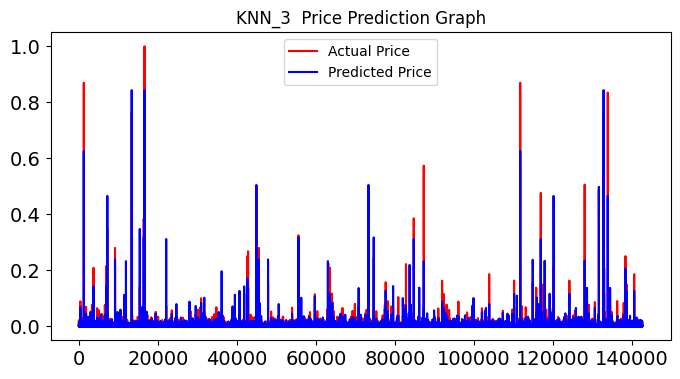

_____KNN_5 Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.734718515389992
MSE Mean Squared Error [TRAIN]: 1.5561339693039064e-05
RMSE Root Mean Squared Error [TRAIN]: 0.003944786393841758
MAE Mean Absolute Error [TRAIN]: 0.0003739481797926104
____ Testing Data _____
R-squared [TEST]: 0.5760203824425345
MSE Mean Squared Error [TEST]: 1.9232191537976318e-05
RMSE Root Mean Squared Error [TEST]: 0.0043854522615092185
MAE Mean Absolute Error [TEST]: 0.00045600372908609544


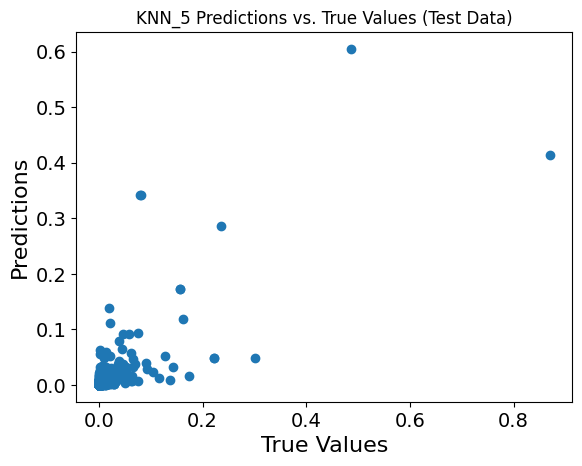

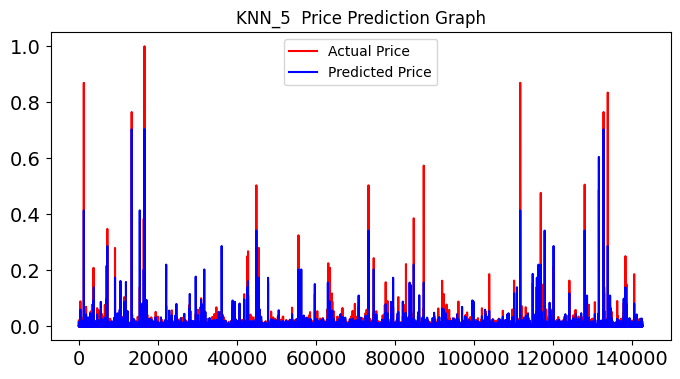

_____KNN_7 Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.6776763555235027
MSE Mean Squared Error [TRAIN]: 1.890741726725056e-05
RMSE Root Mean Squared Error [TRAIN]: 0.004348266006956171
MAE Mean Absolute Error [TRAIN]: 0.0004037664333203976
____ Testing Data _____
R-squared [TEST]: 0.5770736399082874
MSE Mean Squared Error [TEST]: 1.9184414596629795e-05
RMSE Root Mean Squared Error [TEST]: 0.004380001666281623
MAE Mean Absolute Error [TEST]: 0.00045094438872020587


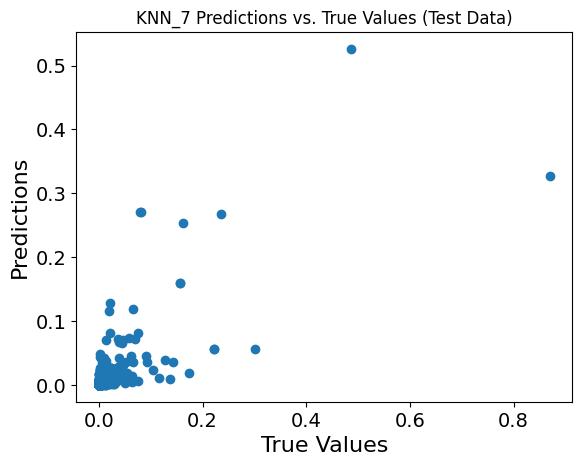

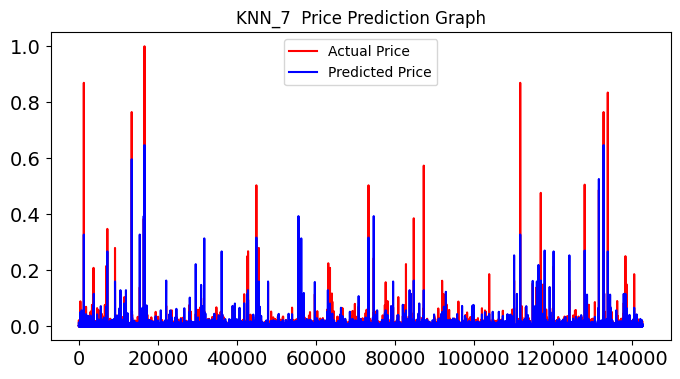

_____KNN_15 Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: 0.5385363713866539
MSE Mean Squared Error [TRAIN]: 2.7069330870910658e-05
RMSE Root Mean Squared Error [TRAIN]: 0.005202819511660063
MAE Mean Absolute Error [TRAIN]: 0.00045061450931836863
____ Testing Data _____
R-squared [TEST]: 0.5170189771470544
MSE Mean Squared Error [TEST]: 2.1908561534698258e-05
RMSE Root Mean Squared Error [TEST]: 0.004680658237331397
MAE Mean Absolute Error [TEST]: 0.0004493563299717948


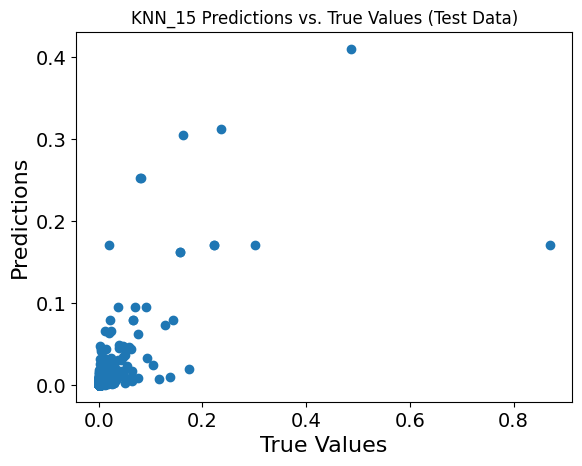

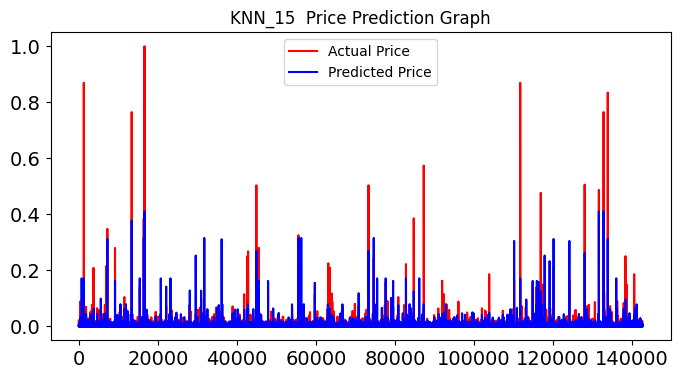

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


_____SVR Regression Metrics_____
____ Training Data _____
R-squared [TRAIN]: -161.5549203333316
MSE Mean Squared Error [TRAIN]: 0.009535427388762606
RMSE Root Mean Squared Error [TRAIN]: 0.09764951299808211
MAE Mean Absolute Error [TRAIN]: 0.09757940110305233
____ Testing Data _____
R-squared [TEST]: -209.2206396833528
MSE Mean Squared Error [TEST]: 0.009535844272226514
RMSE Root Mean Squared Error [TEST]: 0.09765164756534583
MAE Mean Absolute Error [TEST]: 0.09759435060601068


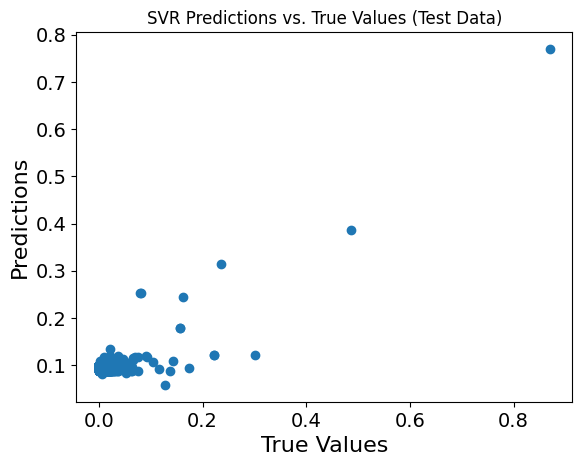

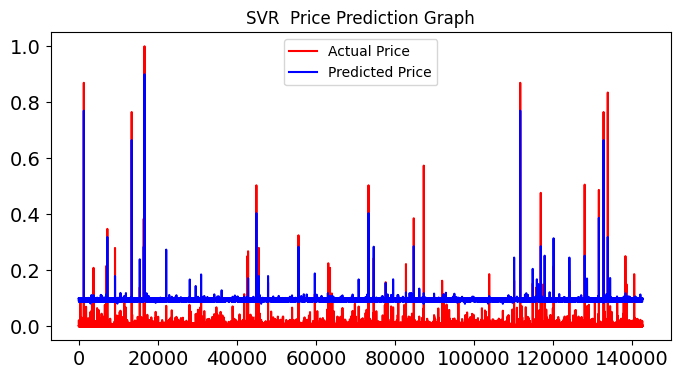

In [12]:
for model_name, model in models.items():
    # Train the model on the entire dataset and evaluate
    # You can use either y_train_min_max_scaled or y_train_standardized
    
    model.fit(X_train, y_train_min_max_scaled)
    get_regression_metrics(model_name, model, X_train, y_train_min_max_scaled, X_test,
                           y_test_min_max_scaled)  # Use the corresponding scaled/standardized y_test
